In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import seaborn as sns
import proplot as pplt                       # Fonts 
from scipy import stats                      # Remove outliers 

In [2]:
# Importing data
train_set = pd.read_csv('TRAIN.csv')
train_set.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [3]:
test_set = pd.read_csv('TEST_FINAL.csv')
test_set.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [4]:
sample = pd.read_csv('SAMPLE.csv')
sample.head()

,ID,Sales
0,T1188341,42275
1,T1188342,42275
2,T1188343,42275
3,T1188344,42275
4,T1188345,42275


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
test_set.info() # Data types also match

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [7]:
# Checking for null, missing and cleaning if needed.

train_set.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [8]:
test_set.isnull().sum() # No nulls !

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [9]:
train_set.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [10]:
test_set.describe()

,Store_id,Holiday
count,22265.000000,22265.000000
mean,183.000000,0.032787
std,105.368395,0.178082
min,1.000000,0.000000
25%,92.000000,0.000000
50%,183.000000,0.000000
75%,274.000000,0.000000
max,365.000000,1.000000


In [11]:
# Since Categorical columns are present, let's see to convert but before that let's notice the mutual info scores.
# Converting dates to datatime
train_set['Date'] = pd.to_datetime(train_set['Date'])
test_set['Date'] = pd.to_datetime(test_set['Date'])


test_set.info() #head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             22265 non-null  object        
 1   Store_id       22265 non-null  int64         
 2   Store_Type     22265 non-null  object        
 3   Location_Type  22265 non-null  object        
 4   Region_Code    22265 non-null  object        
 5   Date           22265 non-null  datetime64[ns]
 6   Holiday        22265 non-null  int64         
 7   Discount       22265 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 1.4+ MB


In [12]:
# Replacing dates with days from init
latest = train_set['Date'].max()
oldest = train_set['Date'].min()

train_set['Days'] = (train_set['Date'] - oldest).dt.days
train_set.tail(10)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Days
188330,T1188331,147,S4,L2,R4,2019-05-31,1,No,84,48026.88,515
188331,T1188332,31,S1,L5,R2,2019-05-31,1,No,48,27760.08,515
188332,T1188333,150,S4,L2,R1,2019-05-31,1,Yes,137,86994.18,515
188333,T1188334,339,S4,L2,R1,2019-05-31,1,No,85,50018.34,515
188334,T1188335,151,S1,L3,R2,2019-05-31,1,No,38,24105.60,515
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00,515
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64,515
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56,515
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41,515
188339,T1188340,152,S2,L1,R1,2019-05-31,1,No,47,37977.00,515


In [13]:
# Replacing dates with days from oldest date
latest = test_set['Date'].max()
oldest = test_set['Date'].min()

test_set['Days'] = (test_set['Date'] - oldest).dt.days
test_set.tail(10)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Days
22255,T1210596,189,S2,L3,R3,2019-07-31,0,Yes,60
22256,T1210597,188,S3,L2,R1,2019-07-31,0,No,60
22257,T1210598,187,S1,L1,R1,2019-07-31,0,No,60
22258,T1210599,336,S4,L2,R1,2019-07-31,0,No,60
22259,T1210600,70,S1,L1,R3,2019-07-31,0,Yes,60
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No,60
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No,60
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes,60
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No,60
22264,T1210605,365,S2,L1,R2,2019-07-31,0,No,60


In [16]:
# Dropping unusable columns
X = train_set.drop(columns=['ID','Date','#Order'])
X_test = test_set.drop(columns=['ID','Date'])

X.head(10)

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Days
0,1,S1,L3,R1,1,Yes,7011.84,0
1,253,S4,L2,R1,1,Yes,51789.12,0
2,252,S3,L2,R1,1,Yes,36868.20,0
3,251,S2,L3,R1,1,Yes,19715.16,0
4,250,S2,L3,R4,1,Yes,45614.52,0
5,249,S1,L3,R2,1,Yes,34211.22,0
6,248,S1,L1,R2,1,Yes,35352.66,0
7,247,S1,L1,R3,1,Yes,52650.00,0
8,246,S3,L1,R3,1,Yes,42633.78,0
9,254,S4,L1,R1,1,Yes,62572.80,0


<AxesSubplot:>

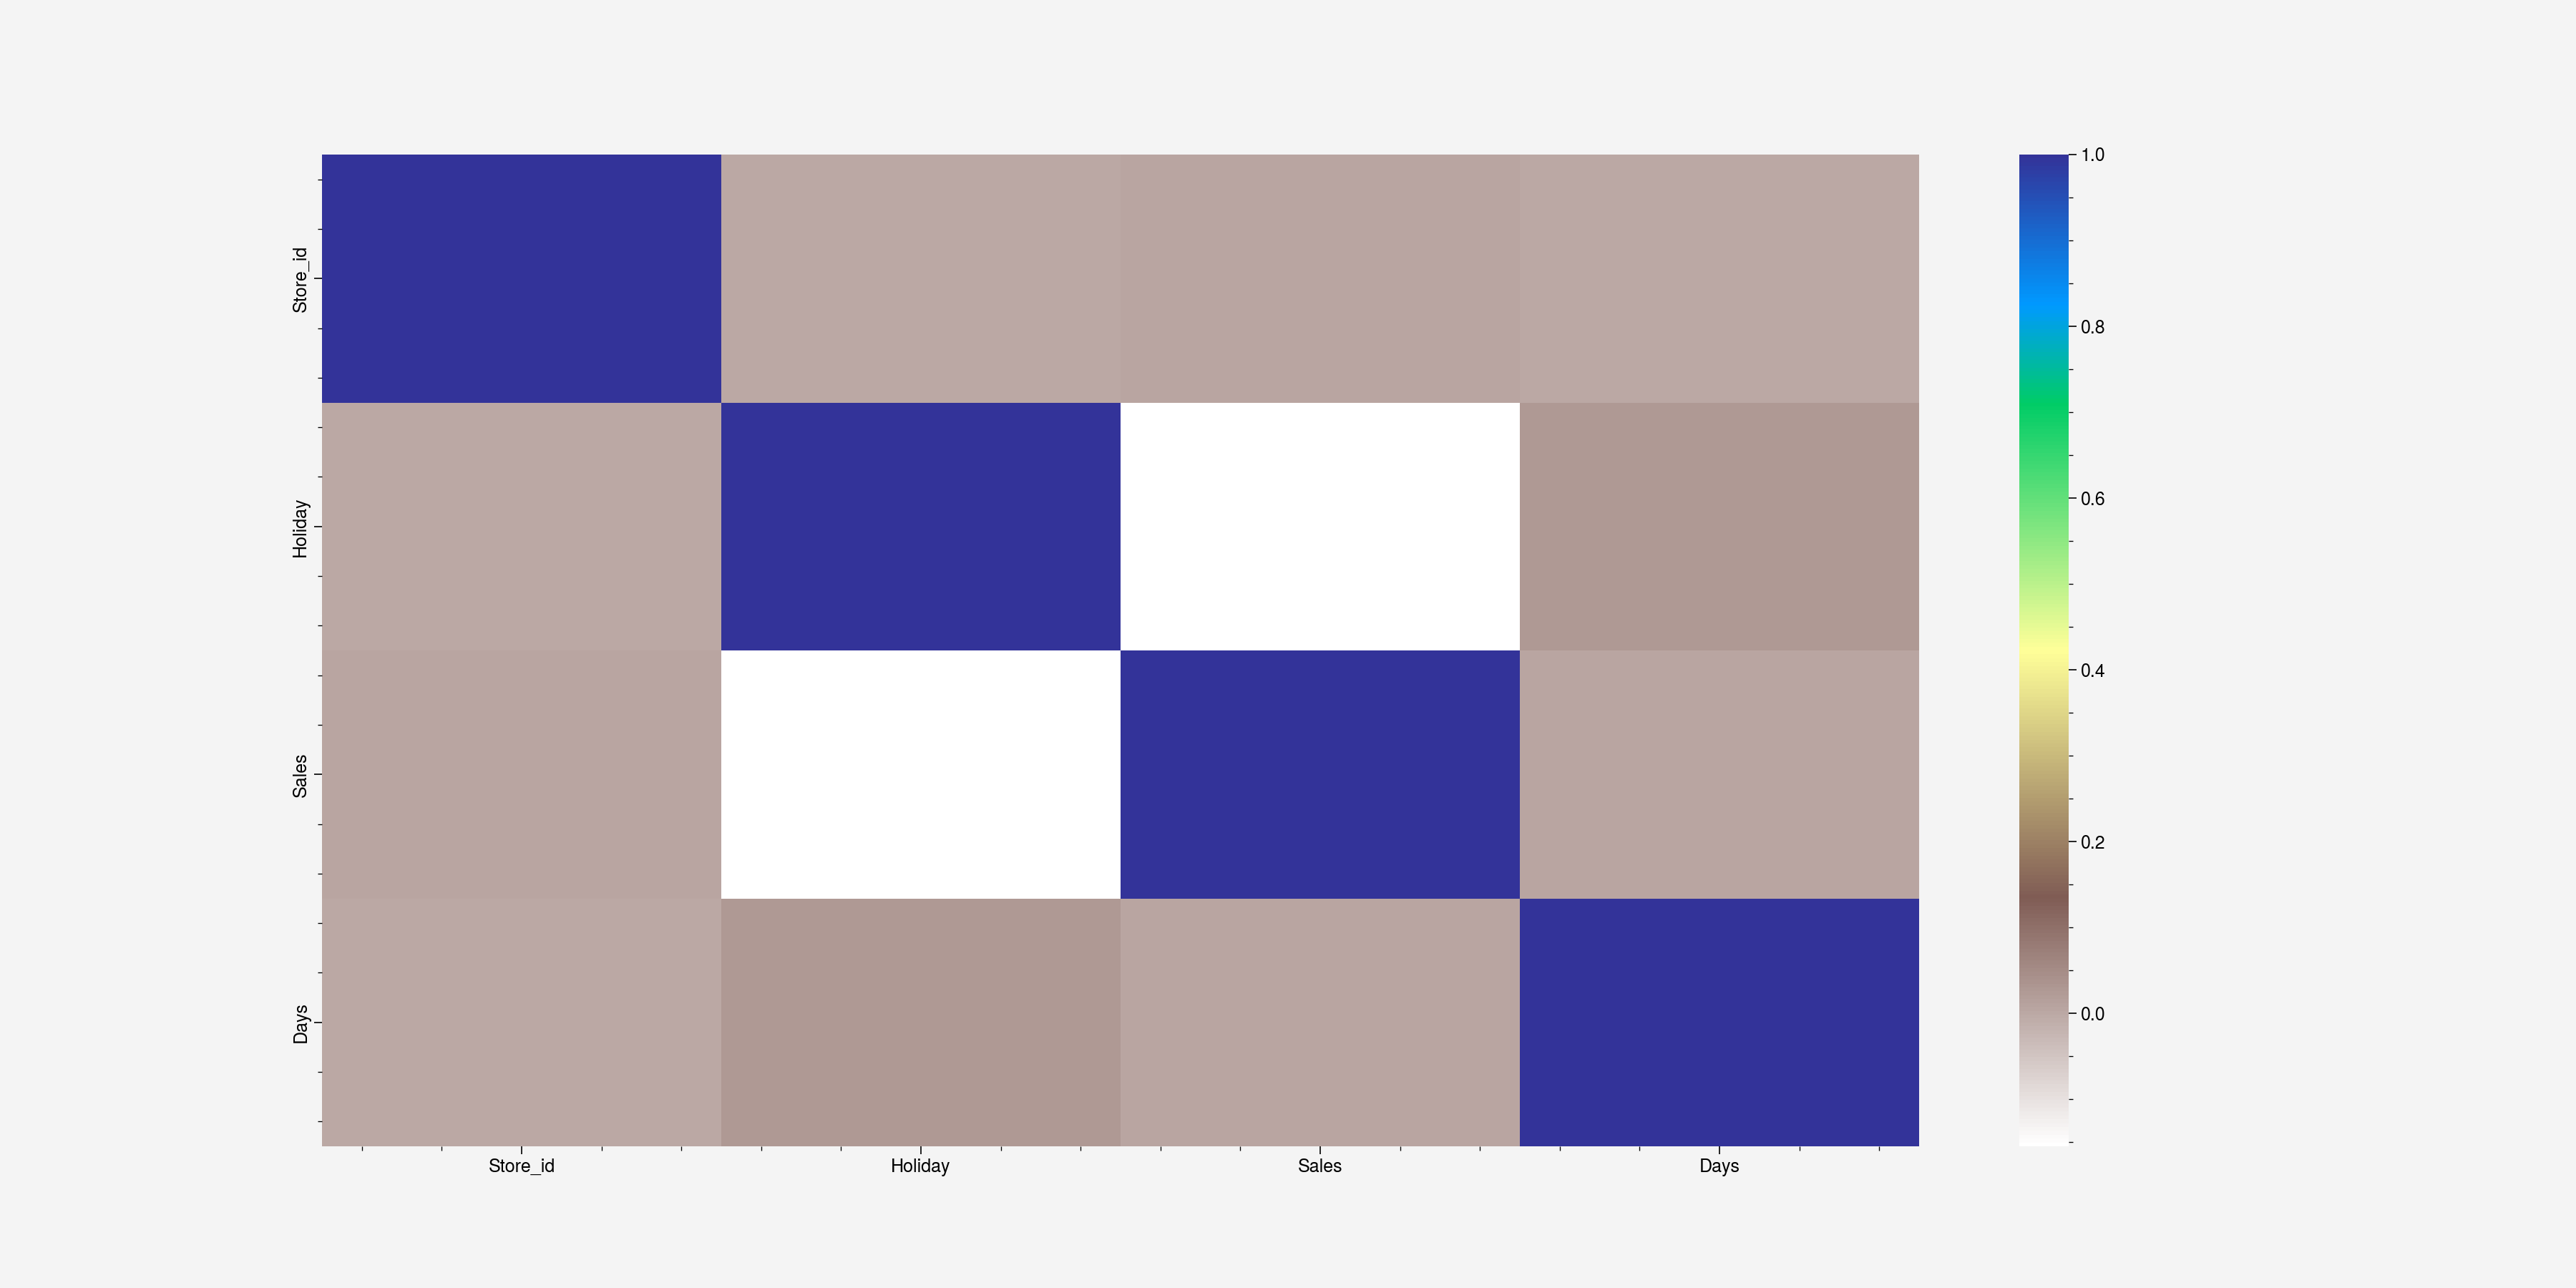

In [20]:
# Corr heatmap
plt.figure(figsize=(18,9))
sns.heatmap(X.corr(),cmap='terrain_r')

In [21]:
print(" Store types: ", X['Store_Type'].unique())
print(" Location types: ", X['Location_Type'].unique())
print(" Region types: ", X['Region_Code'].unique())

 Store types:  ['S1' 'S4' 'S3' 'S2']
 Location types:  ['L3' 'L2' 'L1' 'L5' 'L4']
 Region types:  ['R1' 'R4' 'R2' 'R3']


In [25]:
# Encoding categoricals.

from sklearn.preprocessing import LabelEncoder 

cat_cols = [e for e in X.columns if X[e].dtype == "object"]

print("Categorical columns are : ",cat_cols,X.columns)


for ec in cat_cols:
    dummy_col = None
    dummy_col = pd.get_dummies(X[ec])
    X = pd.concat([X,dummy_col],axis=1)
    X = X.drop([ec],axis=1)

X.head(10)

Categorical columns are :  ['Store_Type', 'Location_Type', 'Region_Code', 'Discount'] Index(['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday',
       'Discount', 'Sales', 'Days'],
      dtype='object')


,Store_id,Holiday,Sales,Days,S1,S2,S3,S4,L1,L2,L3,L4,L5,R1,R2,R3,R4,No,Yes
0,1,1,7011.84,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,253,1,51789.12,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,252,1,36868.20,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,251,1,19715.16,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,250,1,45614.52,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
5,249,1,34211.22,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
6,248,1,35352.66,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
7,247,1,52650.00,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
8,246,1,42633.78,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
9,254,1,62572.80,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1


In [27]:
# Repeating for X_test
cat_cols = [e for e in X_test.columns if X_test[e].dtype == "object"]

for ec in cat_cols:
    dummy_col = None
    dummy_col = pd.get_dummies(X_test[ec])
    X_test = pd.concat([X_test,dummy_col],axis=1)
    X_test = X_test.drop([ec],axis=1)

X_test.head(10)

,Store_id,Holiday,Days,S1,S2,S3,S4,L1,L2,L3,L4,L5,R1,R2,R3,R4,No,Yes
0,171,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
1,172,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,173,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,174,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,170,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
5,175,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
6,176,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
7,169,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
8,14,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
9,177,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0


In [29]:
#T-T-S

from sklearn.model_selection import train_test_split


y = X['Sales'] 
X = X.drop(columns=['Sales'])

In [30]:
# Mutual Info scores have been poor on this one, Hence skipped.

"""

from sklearn.feature_selection import mutual_info_regression

discrete_features = X.dtypes == int
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = ps.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::]
"""

'\n\nfrom sklearn.feature_selection import mutual_info_regression\n\ndiscrete_features = X.dtypes == int\ndef make_mi_scores(X, y, discrete_features):\n    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)\n    mi_scores = ps.Series(mi_scores, name="MI Scores", index=X.columns)\n    mi_scores = mi_scores.sort_values(ascending=False)\n    return mi_scores\n\nmi_scores = make_mi_scores(X, y, discrete_features)\nmi_scores[::]\n'

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,train_size=0.78,random_state=42 ) 

print("X_train columns are : ",X_train.head())

X_train columns are :          Store_id  Holiday  Days  S1  S2  S3  S4  L1  L2  L3  L4  L5  R1  R2  \
176645        89        0   483   1   0   0   0   0   0   0   1   0   1   0   
49906        178        0   136   0   0   1   0   0   1   0   0   0   0   0   
171161        84        1   468   1   0   0   0   1   0   0   0   0   0   0   
134179       227        0   367   0   0   0   1   0   1   0   0   0   1   0   
12919         54        0    35   1   0   0   0   0   1   0   0   0   0   0   

        R3  R4  No  Yes  
176645   0   0   1    0  
49906    1   0   0    1  
171161   1   0   1    0  
134179   0   0   0    1  
12919    1   0   1    0  


In [32]:
# Rename the values on "Discount" 
train_set['Discount'] = train_set['Discount'].map({'Yes': 1, 'No': 0})

In [33]:
# Data types
print('Data type per variable:')
print(train_set.dtypes)

Data type per variable:
ID                       object
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                float64
#Order                    int64
Sales                   float64
Days                      int64
dtype: object


In [34]:
# Changing data types
train_set[['Store_id', 'Holiday', 'Discount']] = train_set[['Store_id', 'Holiday', 'Discount']].astype(object)
train_set['Date'] = pd.to_datetime(train_set.Date)

In [35]:
# Do we have duplicates?
print('Number of duplicates:', len(train_set[train_set.duplicated()]))

# Do we have missing values?
print('Number of missing values:', train_set.isnull().sum().sum())

Number of duplicates: 0
Number of missing values: 188340


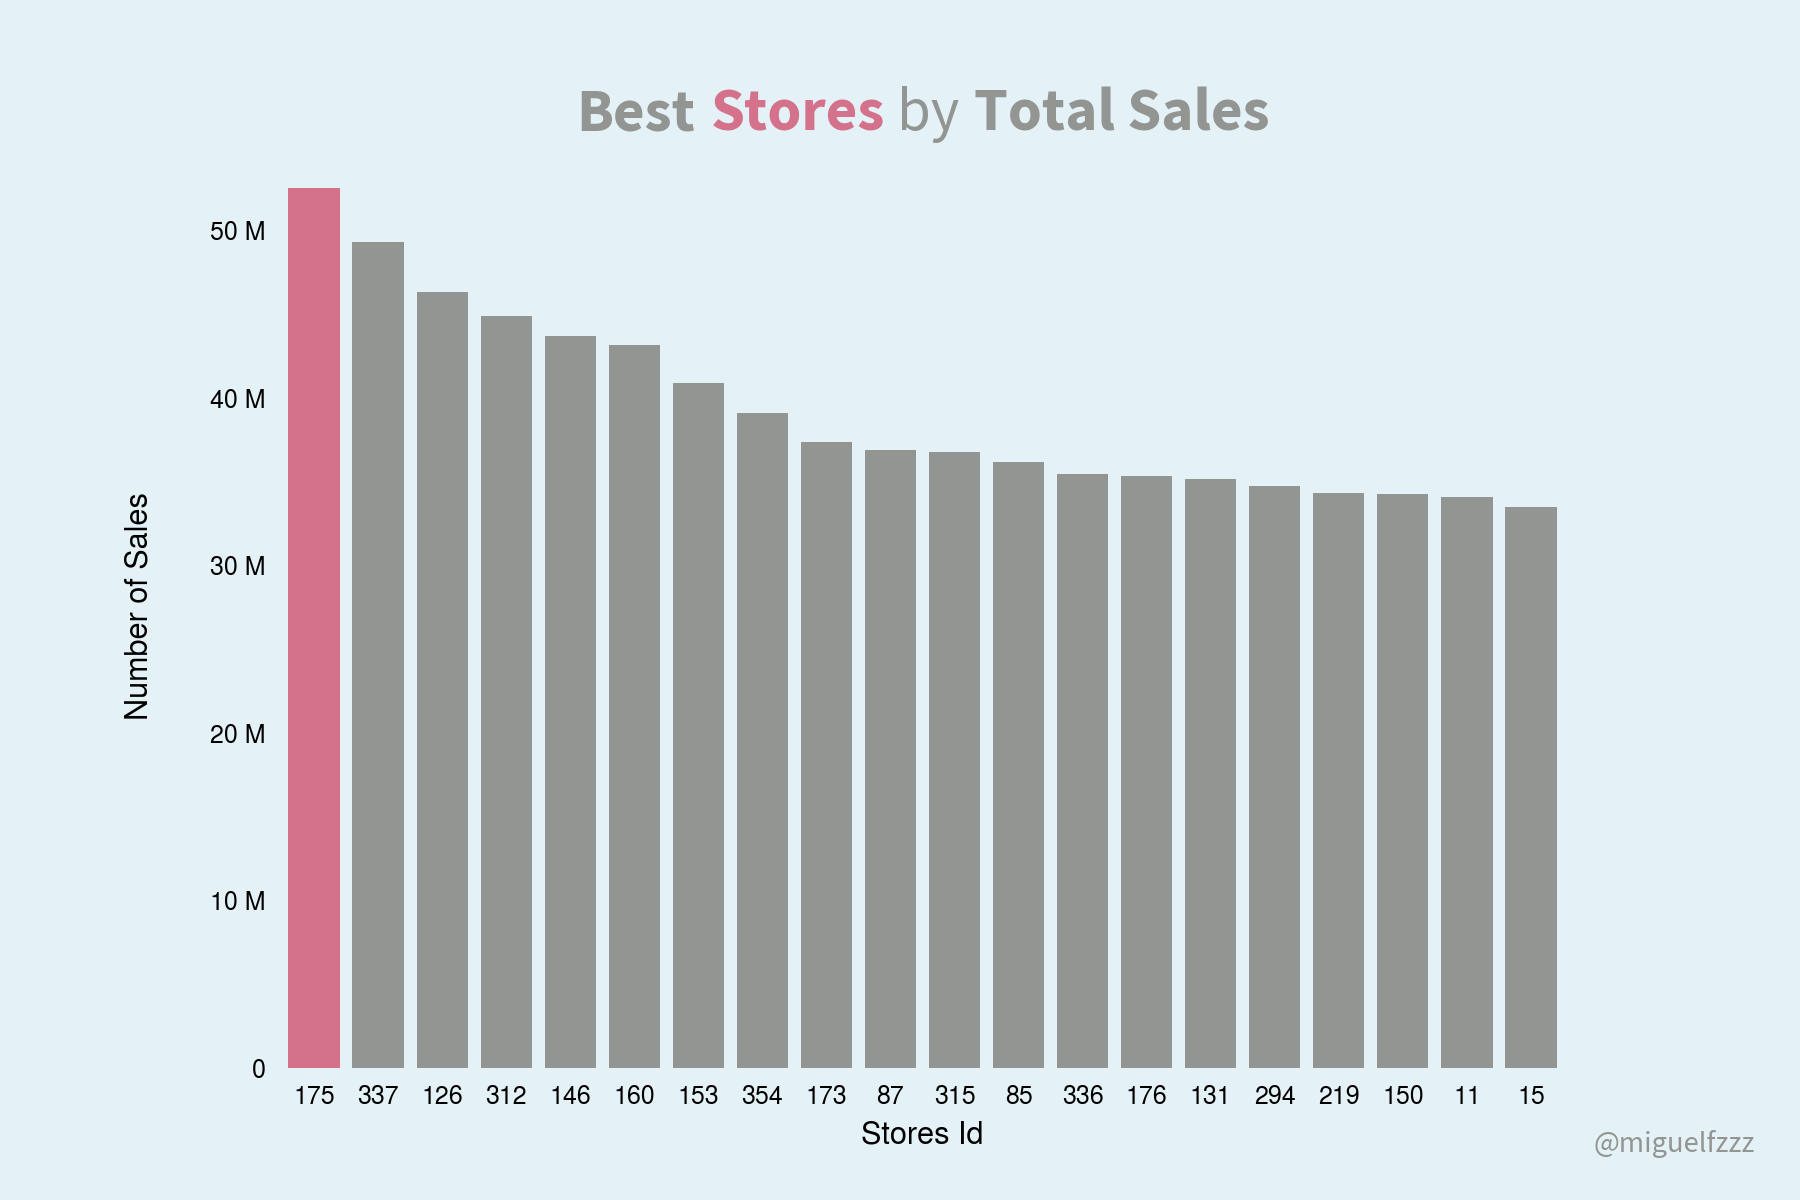

In [36]:
import matplotlib.pyplot as plt
# Which are the best stores (by number of sells)?
best_stores = train_set.groupby(['Store_id'], as_index=False)['Sales'].sum()        # sum sales from same store
best_stores = best_stores.sort_values('Sales', ascending = False)                # sort data
best_stores = best_stores.head(20)                                               # select top 20
best_stores['Store_id'] = best_stores['Store_id'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_stores.head(1)
col2 = best_stores.tail(19)

ax.bar(col1.Store_id, col1.Sales, color = '#d4728c')
ax.bar(col2.Store_id, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(mticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Stores Id', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(4.1, 56000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(6.2, 56000000, "Stores", size=22, color="#d4728c", fontweight="bold")
plt.text(9.1, 56000000, "by", size=22, color="grey")
plt.text(10.3, 56000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(22.5, -5000000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

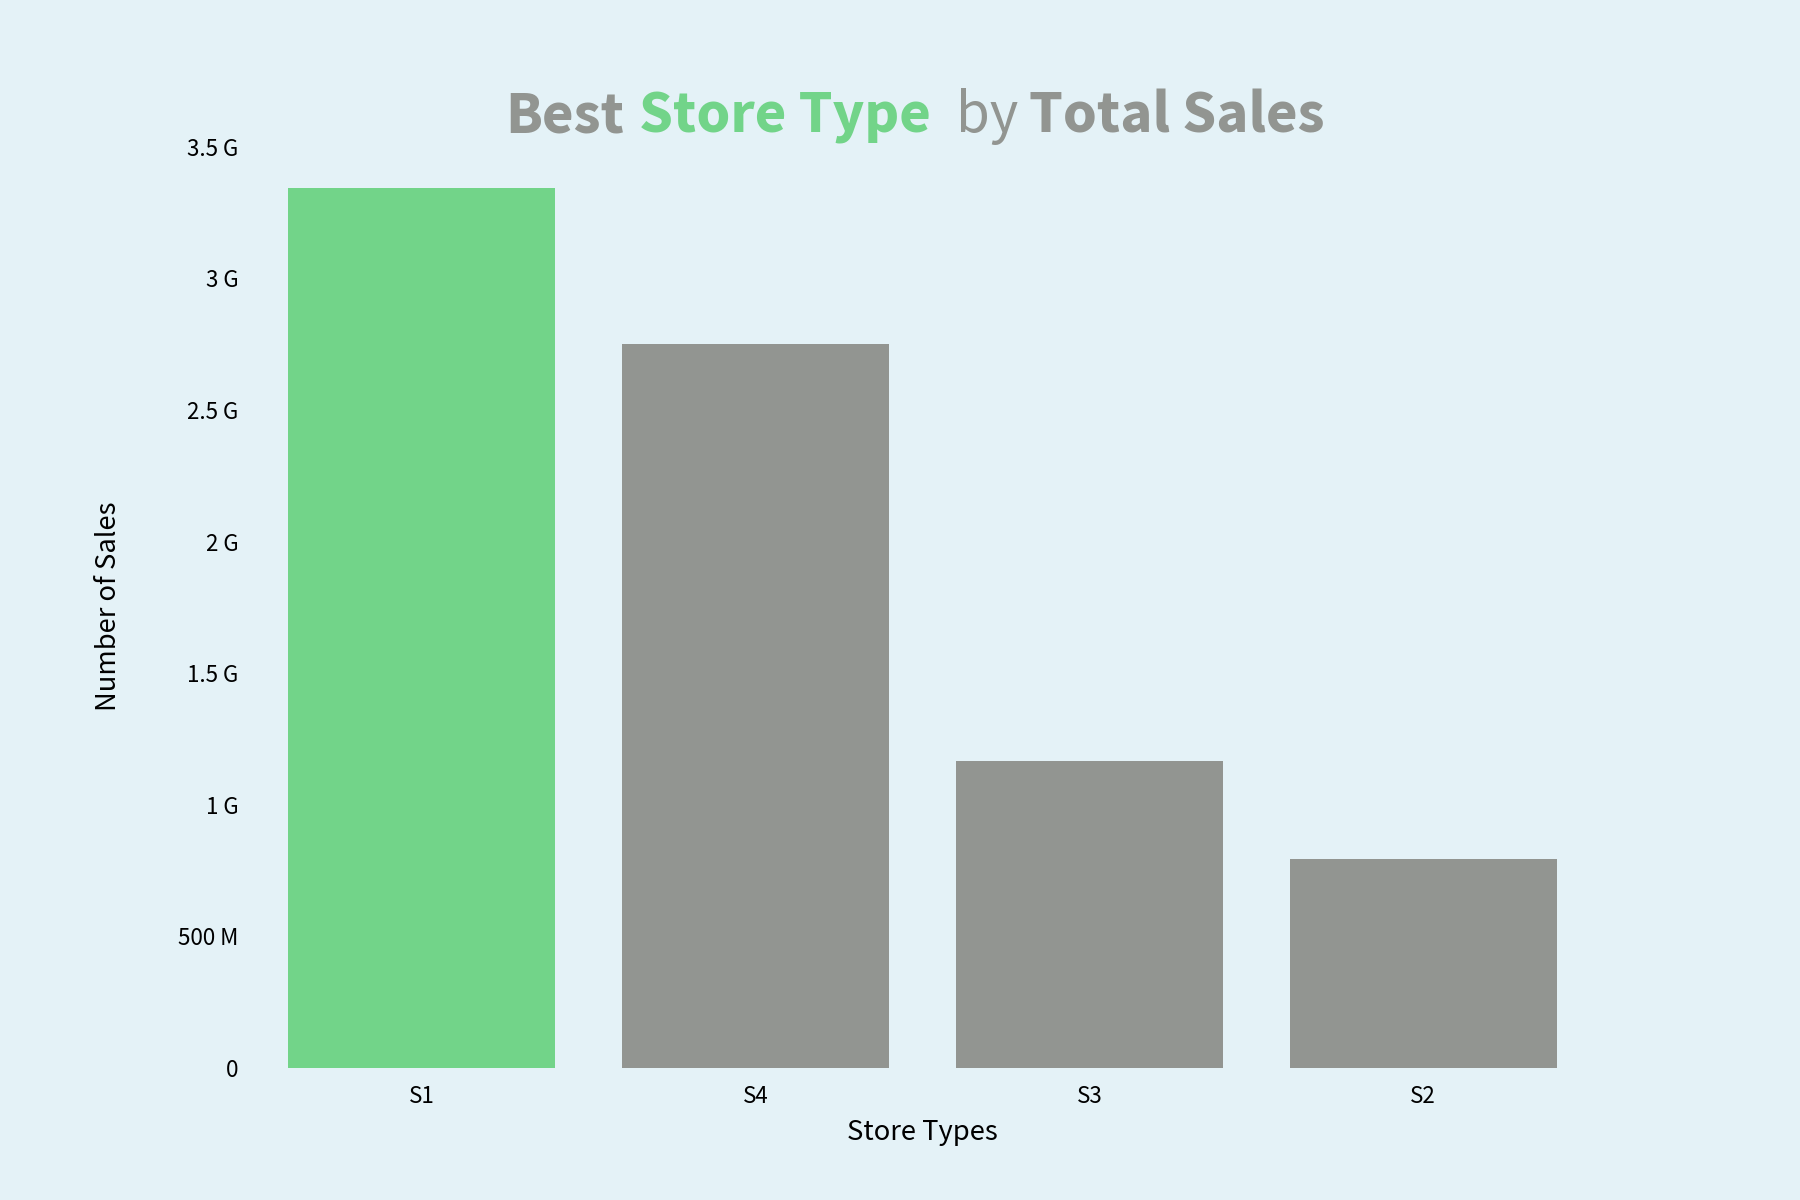

In [37]:
# Which are the best store types (by number of sales)?
best_store_type = train_set.groupby(['Store_Type'], as_index=False)['Sales'].sum()    
best_store_type = best_store_type.sort_values('Sales', ascending = False)                  
best_store_type['Store_Type'] = best_store_type['Store_Type'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_store_type.head(1)
col2 = best_store_type.tail(3)

ax.bar(col1.Store_Type, col1.Sales, color = '#72d489')
ax.bar(col2.Store_Type, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(mticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Store Types', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(0.25, 3555000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(0.65, 3555000000, "Store Type", size=22, color="#72d489", fontweight="bold")
plt.text(1.6, 3555000000, "by", size=22, color="grey")
plt.text(1.82, 3555000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(22.5, -5000000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

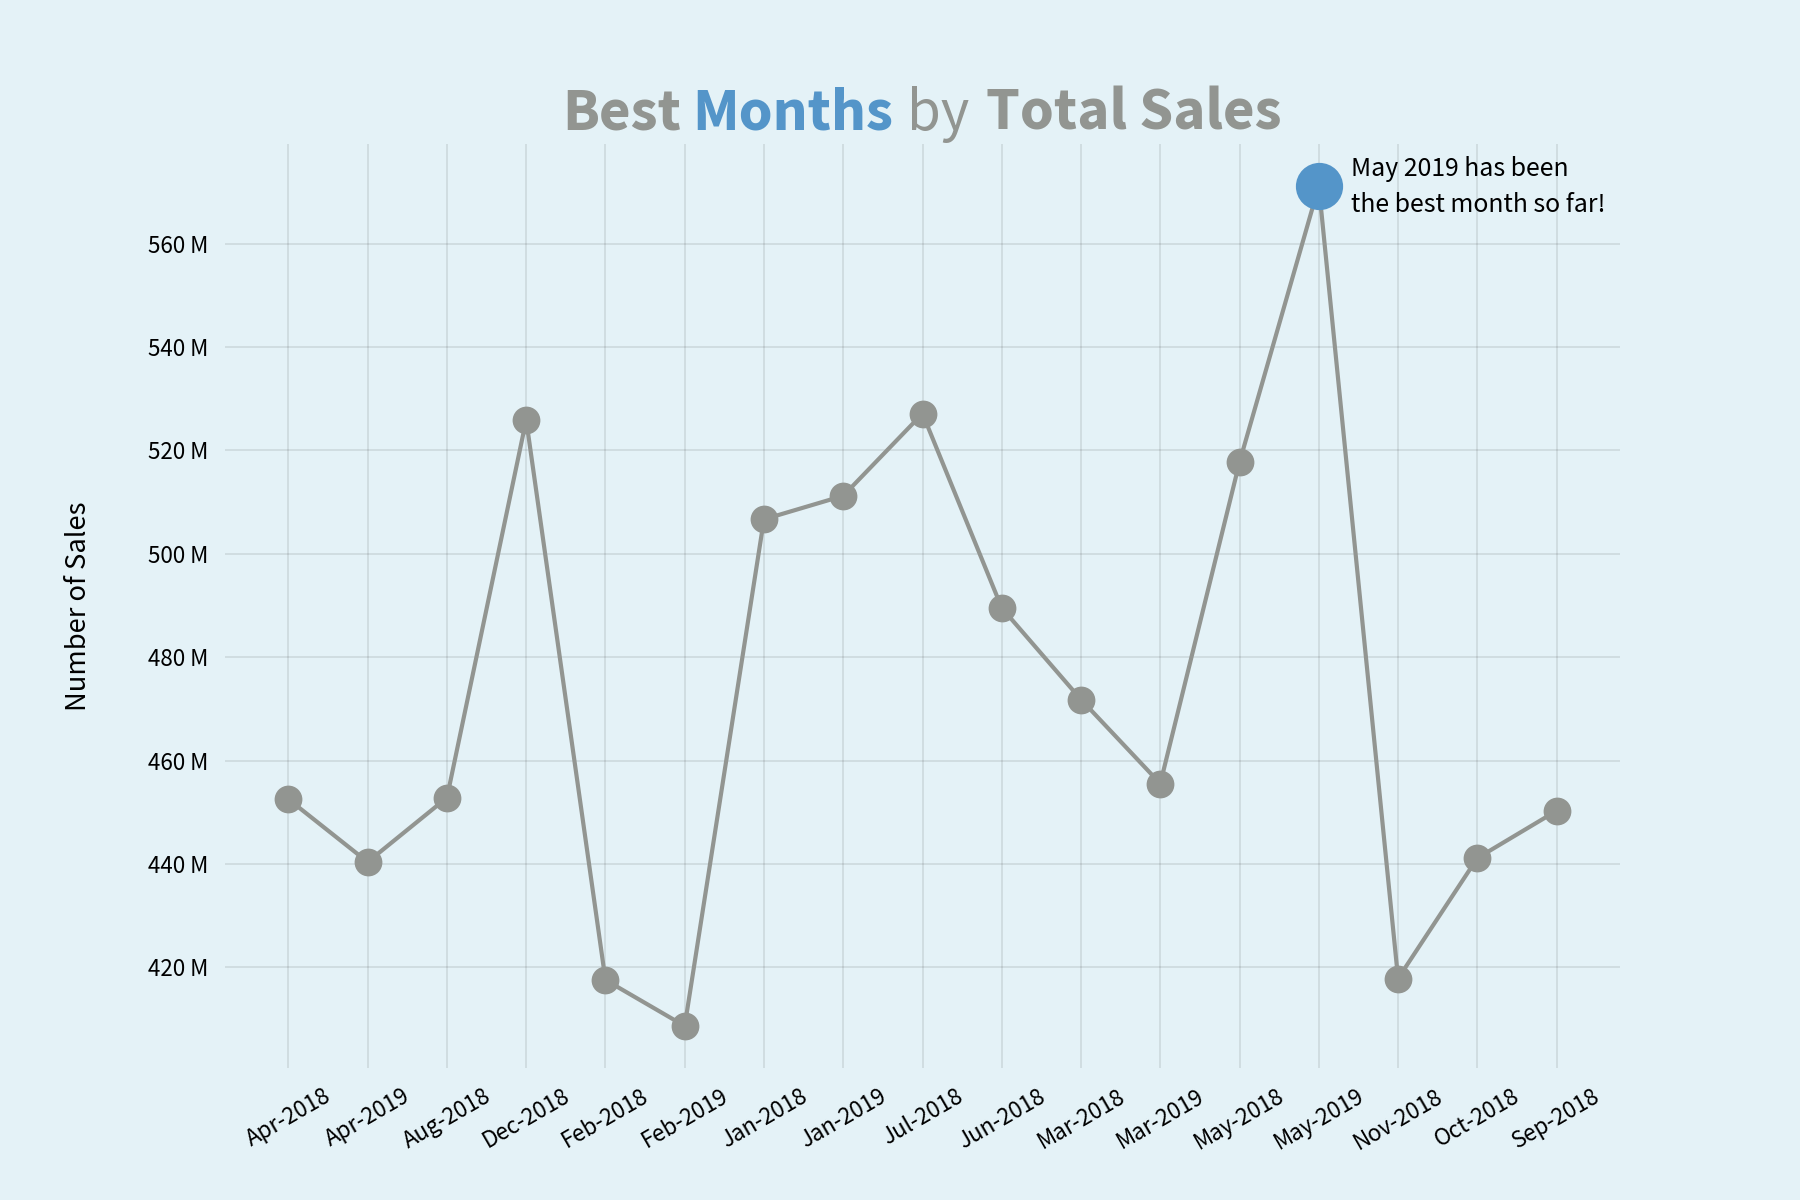

In [38]:
#Best months by sells
best_month = train_set.copy()
best_month['Month'] = best_month['Date'].apply(lambda x: x.strftime('%b-%Y')) 
best_month = best_month.groupby(['Month'], as_index=False)['Sales'].sum()  

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

best_month_1 = best_month.sort_values('Sales', ascending = False).head(1)

ax.plot(best_month.Month, best_month.Sales, marker='o', markerfacecolor='grey', color = 'gray', markersize=9)
ax.plot(best_month_1.Month, best_month_1.Sales, marker='o', markerfacecolor='#5495c9', color = '#5495c9', markersize=16)

plt.xticks(rotation=30)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Setting thousands with k
ax.yaxis.set_major_formatter(mticker.EngFormatter())

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Annotations
plt.text(13.4, 573000000, "May 2019 has been", size=10)
plt.text(13.4, 566000000, "the best month so far!", size=10)


# Title
plt.text(3.45, 582000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(5.1, 582000000, "Months", size=22, color="#5495c9", fontweight="bold")
plt.text(7.8, 582000000, "by", size=22, color="grey")
plt.text(8.8, 582000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(38, 43000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

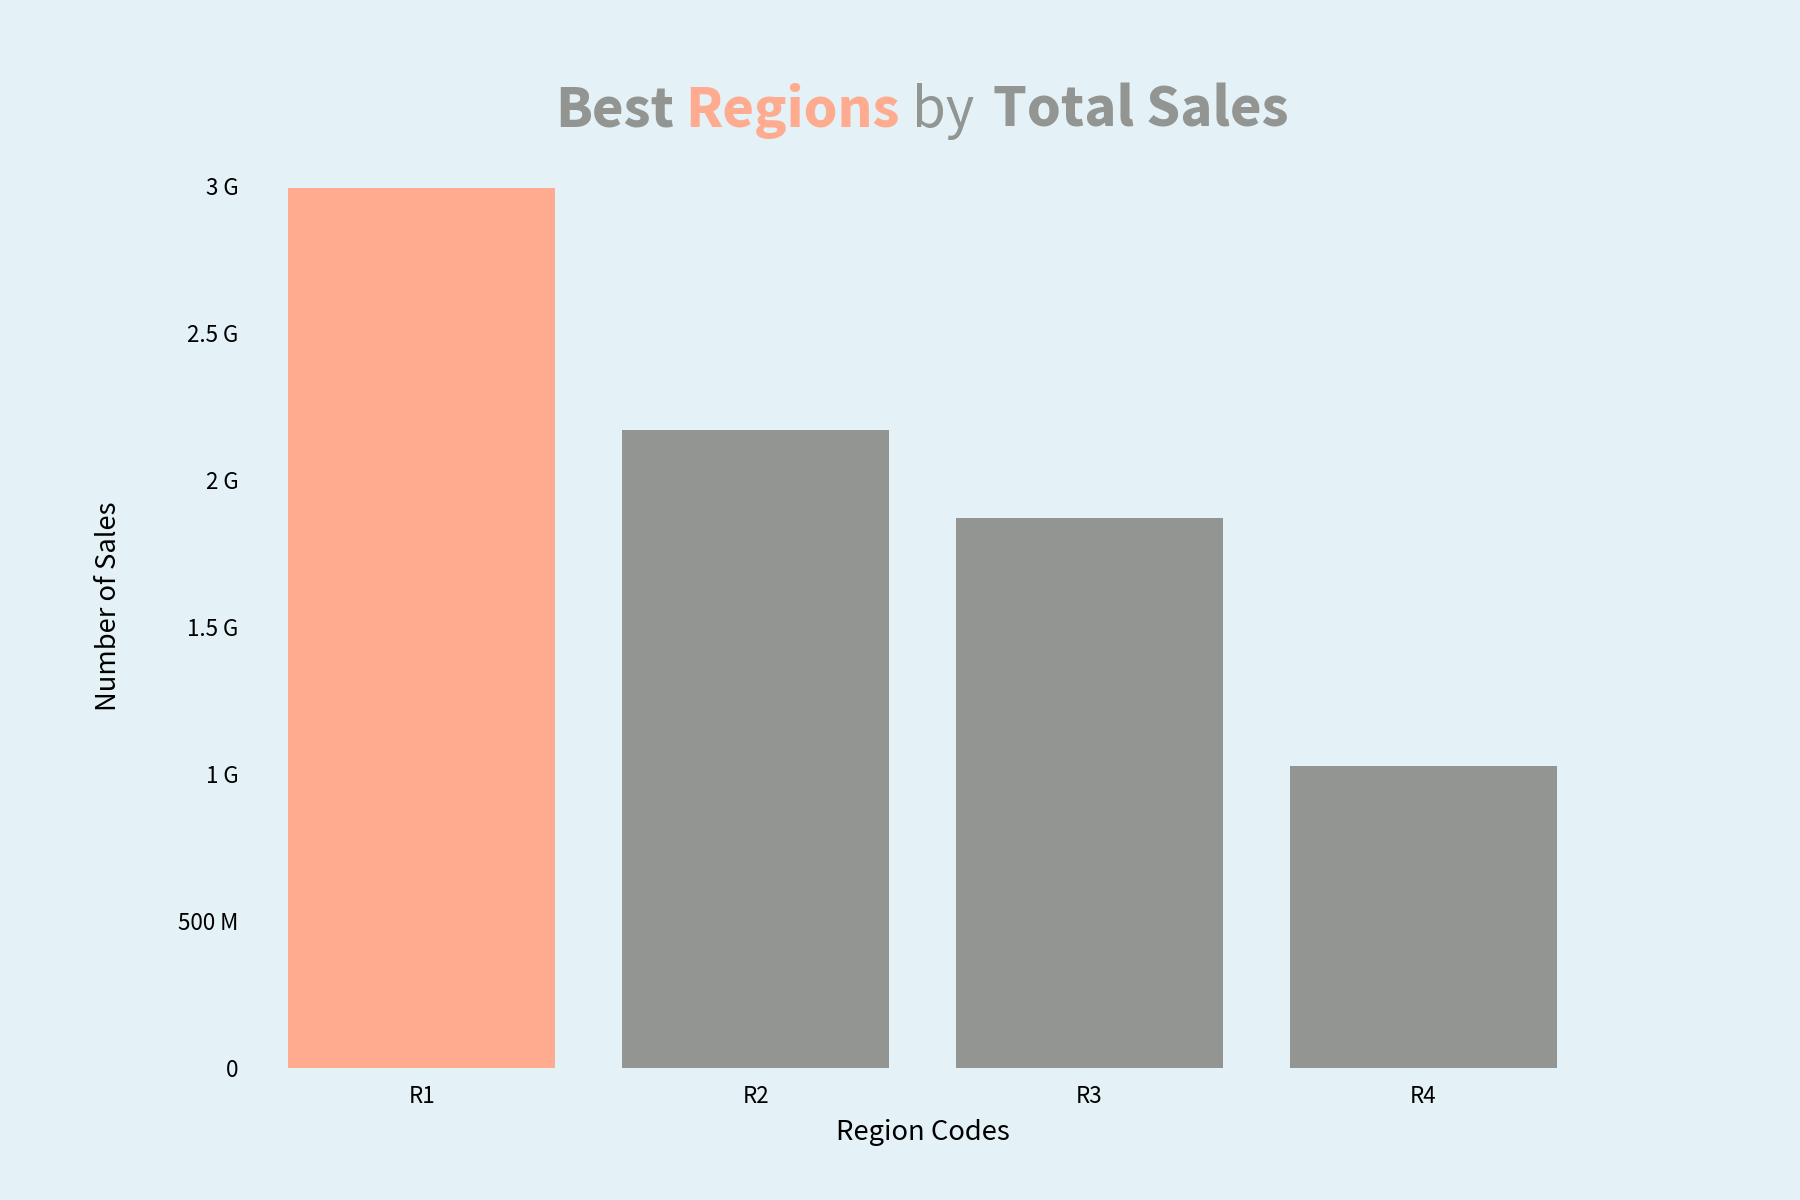

In [39]:
# Which are the best regions (by number of sales)?
best_region = train_set.groupby(['Region_Code'], as_index=False)['Sales'].sum()    
best_region['Region_Code'] = best_region['Region_Code'].astype(str)

# Visualization
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

# For changing colors
col1 = best_region.head(1)
col2 = best_region.tail(3)

ax.bar(col1.Region_Code, col1.Sales, color = '#ffab90')
ax.bar(col2.Region_Code, col2.Sales, color = 'grey')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(mticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

# Labels titles
plt.xlabel('Region Codes', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)

# Title
plt.text(0.4, 3200000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(0.79, 3200000000, "Regions", size=22, color="#ffab90", fontweight="bold")
plt.text(1.47, 3200000000, "by", size=22, color="grey")
plt.text(1.71, 3200000000,"Total Sales", size=22, color="grey", fontweight="bold")

# Author
plt.text(22.5, -5000000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

In [40]:
# Let's check the data again
train_set.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Days
0,T1000001,1,S1,L3,R1,2018-01-01,1,NaN,9,7011.84,0
1,T1000002,253,S4,L2,R1,2018-01-01,1,NaN,60,51789.12,0
2,T1000003,252,S3,L2,R1,2018-01-01,1,NaN,42,36868.20,0
3,T1000004,251,S2,L3,R1,2018-01-01,1,NaN,23,19715.16,0
4,T1000005,250,S2,L3,R4,2018-01-01,1,NaN,62,45614.52,0


In [41]:
# Remove "ID" 
train_set = train_set.drop('ID', 1)

C:\Users\mohammed\AppData\Local\Temp/ipykernel_11860/1920544339.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_set = train_set.drop('ID', 1)


In [42]:
# Data types
print('Data type per variable:')
print(train_set.dtypes)

Data type per variable:
Store_id                 object
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                  object
Discount                 object
#Order                    int64
Sales                   float64
Days                      int64
dtype: object


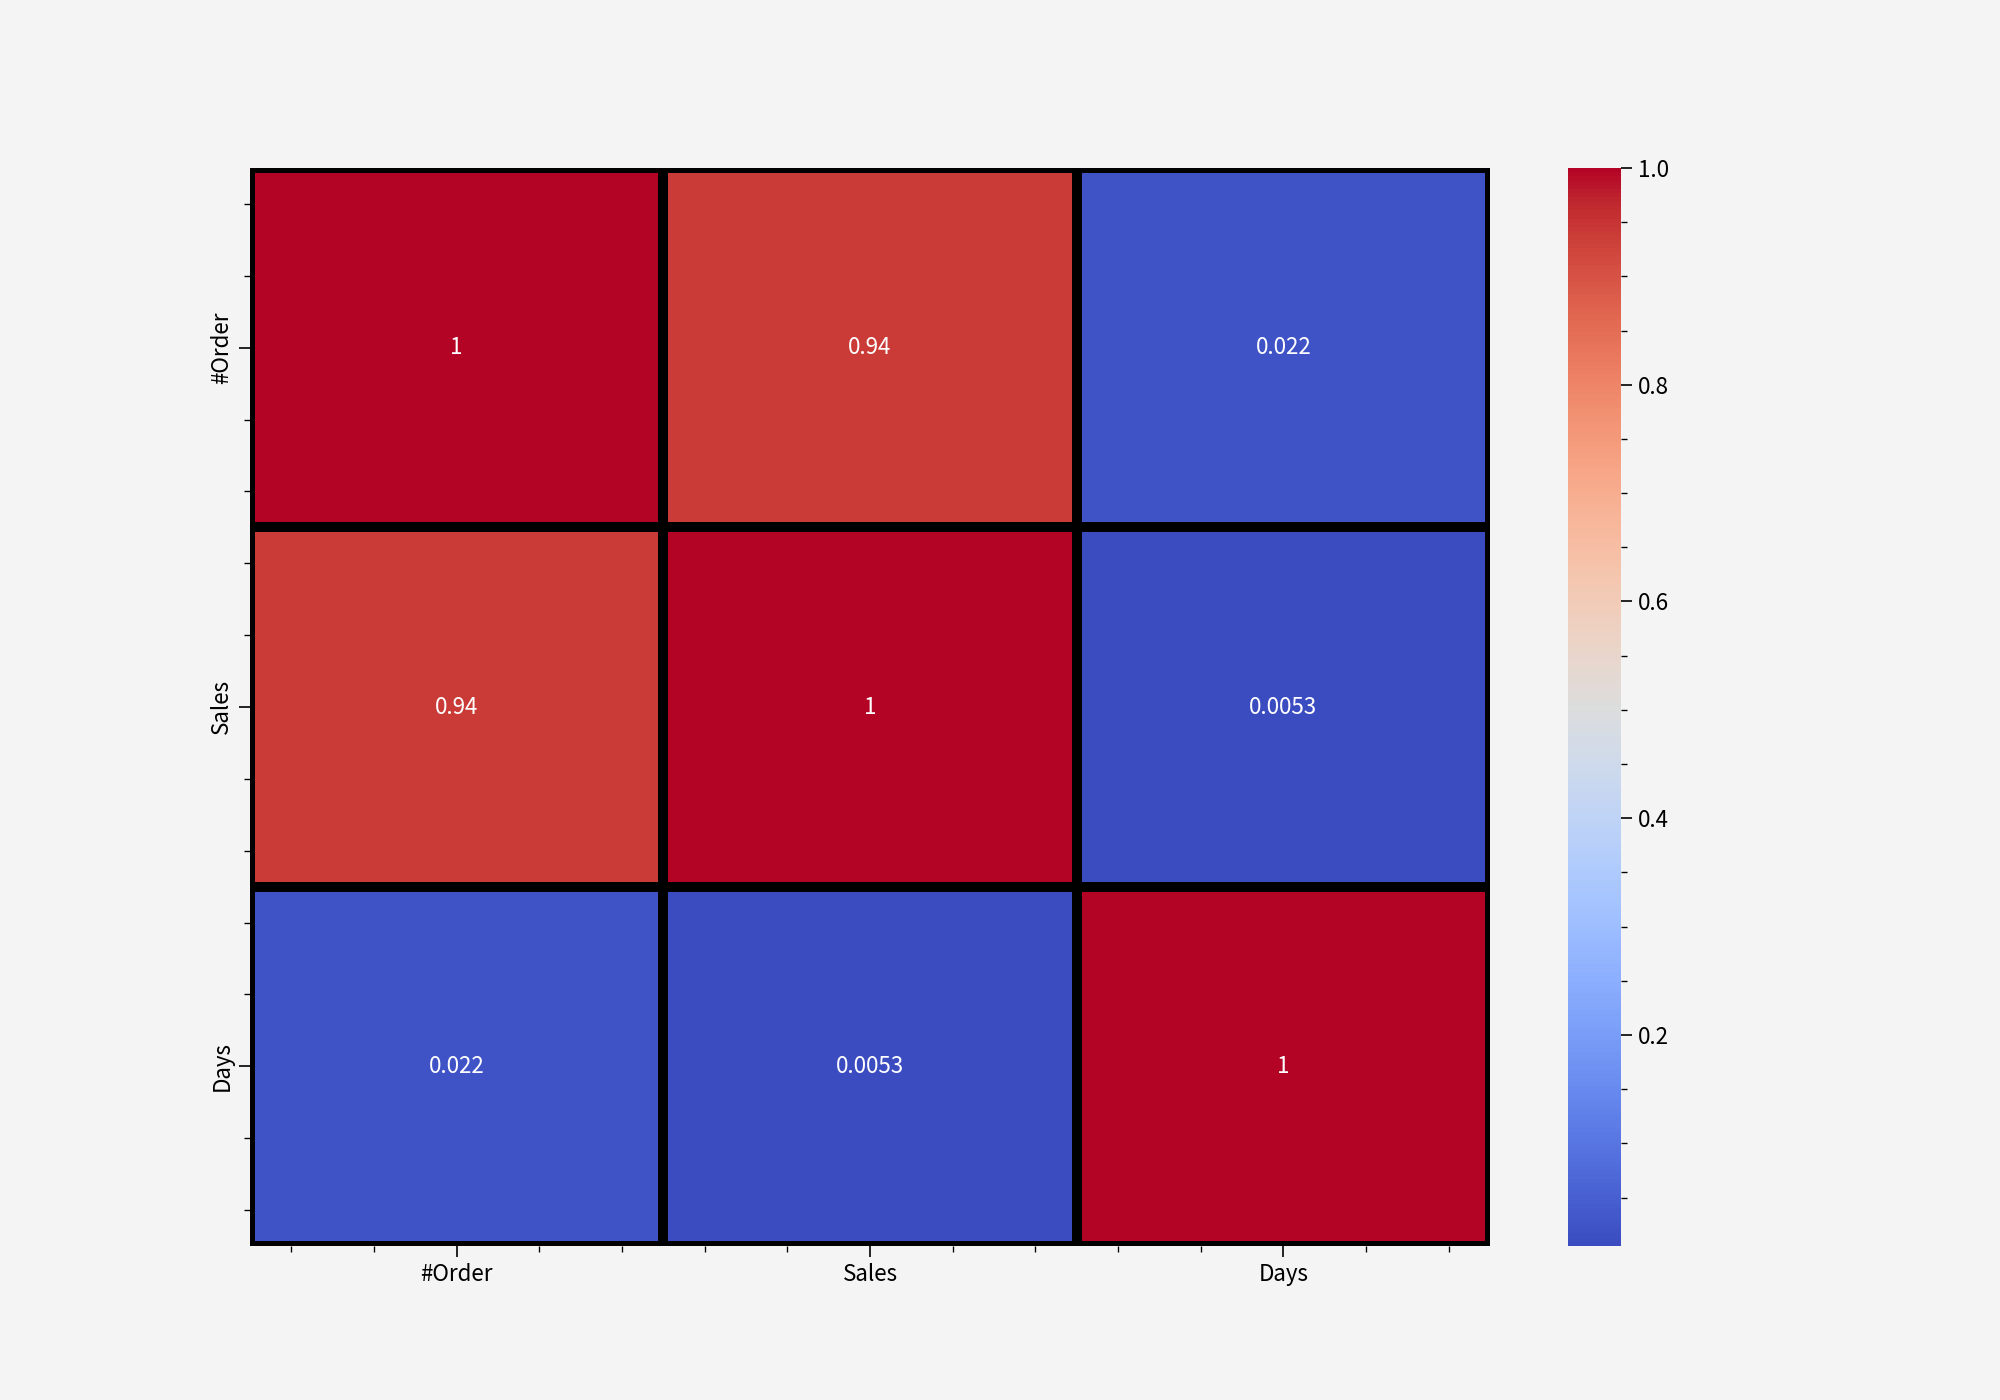

In [44]:
Cm  = train_set.corr()
plt.figure(figsize=(10,7))
sns.heatmap(Cm, annot=True,cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

In [46]:
train_set['holiday_and_discount'] = train_set['Holiday'] * train_set['Discount']

In [47]:
# Dealing with the outliers
q1 = train_set['Sales'].quantile(0.25)
q3 = train_set['Sales'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train_set['Sales'])
for i in train_set['Sales']:
    if i > Upper_tail or i < Lower_tail:
            train_set['Sales'] = train_set['Sales'].replace(i, med)

# I took the code from this notebook -> https://www.kaggle.com/nareshbhat/outlier-the-silent-killer

C:\Users\mohammed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


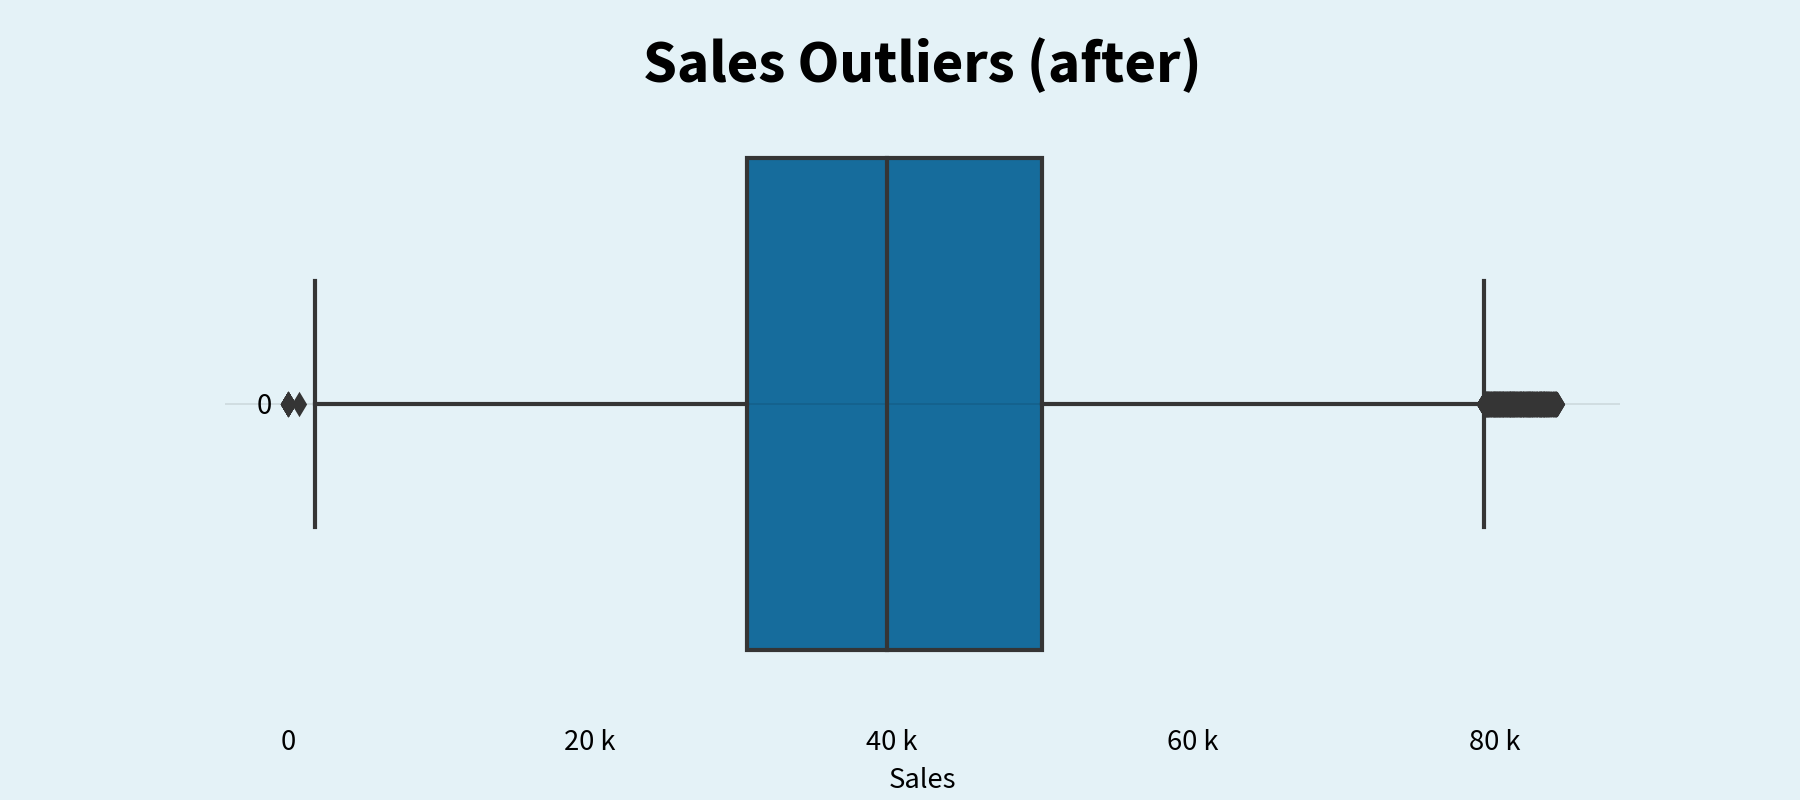

In [48]:
# Visualization
fig, ax = plt.subplots(figsize =(9, 4))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')

sns.boxplot(train_set['Sales']);

ax.tick_params(axis='both', which='major', labelsize=11)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
plt.grid(b=None)

# Setting thousands with k
ax.yaxis.set_major_formatter(mticker.EngFormatter())
ax.xaxis.set_major_formatter(mticker.EngFormatter())

# Y axis position
ax.spines['left'].set_position(('data', -0.5))

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.xlabel('Sales', fontsize=11);

plt.title('Sales Outliers (after)', size=22, fontweight="bold");

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [51]:
rf_reg_model = RandomForestRegressor() #max_depth=15,max_features='auto',n_estimators=80)

rf_reg_model.fit(X_train,y_train)

RandomForestRegressor()

In [52]:
pred1 = rf_reg_model.predict(X_valid) 

In [54]:
rf_r2 = rf_reg_model.score(X_valid,y_valid)
print("R2 Score: ",rf_reg_model.score(X_valid,y_valid))
print('MAE:{}'.format(mean_absolute_error(y_valid,pred1)))
print('MSE:{}'.format(mean_squared_error(y_valid,pred1)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_valid,pred1))))

R2 Score:  0.7776877526730435
MAE:5911.999665476047
MSE:75175976.76668999
RMSE:8670.408108427768


In [55]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg_model = GradientBoostingRegressor()

gb_reg_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [56]:
gb_reg_model.score(X_valid,y_valid)

pred2 = gb_reg_model.predict(X_valid)

In [58]:
gb_r2 = gb_reg_model.score(X_valid,y_valid)
print("R2 Score: ",gb_reg_model.score(X_valid,y_valid))
print('MAE:{}'.format(mean_absolute_error(y_valid,pred2)))
print('MSE:{}'.format(mean_squared_error(y_valid,pred2)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_valid,pred2))))

R2 Score:  0.6469144534012485
MAE:7619.312688639989
MSE:119397609.29465993
RMSE:10926.921309072373


In [59]:
from xgboost import XGBRegressor

xgb_reg_model = XGBRegressor() #max_depth=4,n_estimators = 380,learning_rate = 0.02)

xgb_reg_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [60]:
xgb_reg_model.score(X_valid,y_valid)

pred3 = xgb_reg_model.predict(X_valid) 

In [62]:
xgb_r2 = xgb_reg_model.score(X_valid,y_valid)
print("R2 Score: ",xgb_reg_model.score(X_valid,y_valid))
print('MAE:{}'.format(mean_absolute_error(y_valid,pred3)))
print('MSE:{}'.format(mean_squared_error(y_valid,pred3)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_valid,pred3))))

R2 Score:  0.8188080066409554
MAE:5452.611182863876
MSE:61270961.21266244
RMSE:7827.576969449898


In [63]:
pred_x_test = xgb_reg_model.predict(X_test)

print(pred_x_test)

sample['Sales'] = pred_x_test

[43790.465 41260.85  62550.62  ... 25853.607 17921.232 13820.149]


In [64]:
sample.head(10)

,ID,Sales
0,T1188341,43790.464844
1,T1188342,41260.851562
2,T1188343,62550.621094
3,T1188344,43316.437500
4,T1188345,41413.277344
5,T1188346,74039.937500
6,T1188347,52996.839844
7,T1188348,51936.984375
8,T1188349,58931.371094
9,T1188350,43022.648438


<AxesSubplot:>

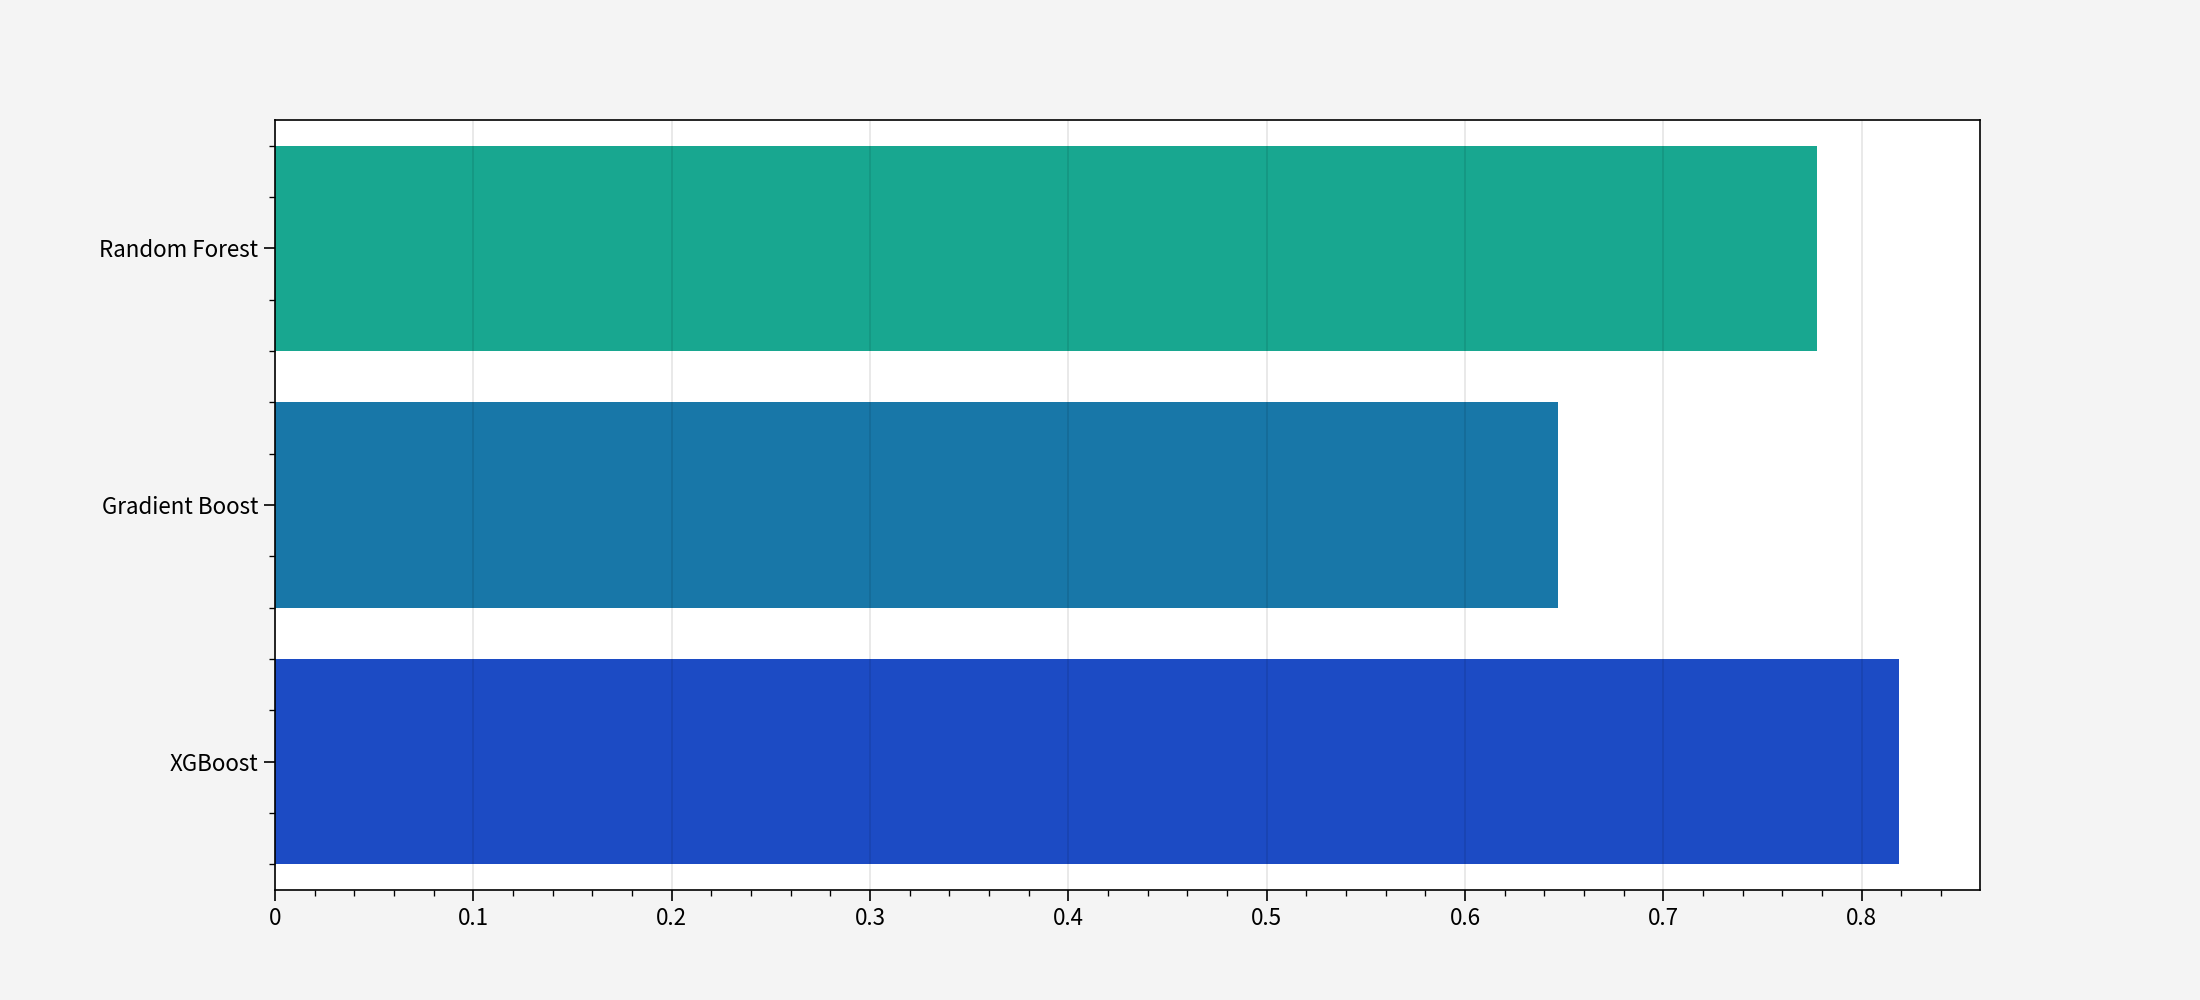

In [66]:
#Scores
scores  = {
    "R2_score" : [rf_r2,gb_r2,xgb_r2],
    "Regressor" : ["Random Forest","Gradient Boost","XGBoost"],
}

plt.figure(figsize=(11,5))
sns.barplot(x=scores["R2_score"],y=scores["Regressor"],palette='winter_r')